# Random Forests - An Ensemble Method for Classification

### Ensemble methods combine multiple algorithms to get better predictive or classification performance.

# Random Forests

A random forest is an ensemble of decision trees (DT). When using a random forest for classification, DTs work together.  Each ultimately gives a class prediction, which is called a "vote."  Once all the predictions are made by the DTs, the new data point is assigned to the class with the most votes.

The visual below shows how the random forest algorithm works.  In this case, 9 DTs predict the class, 0 or 1, for the input data point in the training set. Three DTs predict class 0, while the other 6 predict class 1.  Since more DTs predicted class 1, the  data point is classified as class 1.  Notice, you need to have an odd number of DTs making classifications or you can run into a tie.

![title](./images/RF_01.JPG)

There seems to be a major problem, right?  If you give 25 DTs the same input data from the training set, shouldn't their classifications be the same?  Let's explore 2 reasons why this doesn't happen.

First, random forests use a technique called Bagging (Bootstrap Aggregation).  With bagging, each individual DT is able to randomly sample, with replacement, from the training data set.  This ensures that each DT has  different data from the training data set with which to build its tree and make the prediction.  If bagging was not used, all the DTs would be using the same data could end up with identical trees.

Second, random forests use Feature Randomness.  Rather than using all the available features of the input data to determine each split like a standard DT, each tree has a random subset of features.  Again, this allows for slightly different trees to be built.

The visual below shows an example of Feature Randomness in random forests.  The left, blue rectangle, shows a DT, which uses all features to build its tree.  On the right, Tree 1 uses only Features 2 and 3 to build its tree.  Tree 2 uses Features 1 and 3. This, along with bagging, produces trees trained on different sets of data and ultimately results in lower correlation across trees and more diversification.

![title](./images/RF_02.JPG)

In [1]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Let's see a Random Forest for classification in action using the famous Iris dataset again
(https://archive.ics.uci.edu/ml/datasets/iris)

![title](./images/Irises.jpg)

### Import the Iris dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Print the class names 
# These are the names of the Iris species.  We are trying to classify 
# new, previously unclassified irises as one of these species.
print("***Class Names***")
for item in iris.target_names:
    print(item)

# Print the feature names
# These are the values we will use to perform our classifications
print("\n***Feature Names***")
for item in iris.feature_names:
    print(item)
    
print("\n")

# X will be all 4 features
X = iris.data[:, :4]
# y is the type of flower
y = iris.target


***Class Names***
setosa
versicolor
virginica

***Feature Names***
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)




### Plot the labeled Iris data.  Each color in the scatterplot represents a different class.

Text(0.5, 1.0, 'Sepal Length vs Sepal Width per Category')

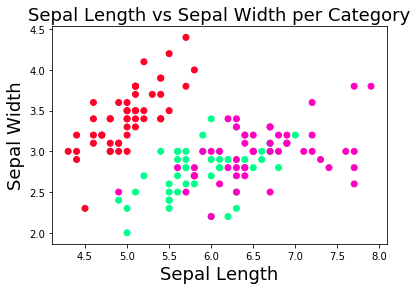

In [3]:
# Plot the data
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.title('Sepal Length vs Sepal Width per Category', fontsize=18)



### Create our Random Forest classifier that uses all 4 features to build it's trees


In [4]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Instantiate the Random Forest classifier
# n_estimators is number of trees to be used in the forest. Try experimenting with this value.
clf=RandomForestClassifier(n_estimators=100)

# Train the model 
clf.fit(X_train,y_train)


RandomForestClassifier()

### See how well our model performs

In [5]:
# Make predictions based on the test set and get the accuracy
# Show the accuracy of the predictions
y_pred=clf.predict(X_test)

# Print the accuracy
print("***Test set accuracy: {:.2f}% ***".format(metrics.accuracy_score(y_test, y_pred)*100))

initial_accuracy = metrics.accuracy_score(y_test, y_pred)*100


***Test set accuracy: 96.67% ***


### Get the importance of each feature to the model.  Features with low importance can potentially be removed from the model for subsequent training.  This can reduce the time and computational resources needed to retrain the model.

In [6]:
# Put the feature names and their importance values into a series
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

# Print the importance
print("***The importance of the features is:***")
print(feature_imp)

***The importance of the features is:***
petal width (cm)     0.487030
petal length (cm)    0.395007
sepal length (cm)    0.083231
sepal width (cm)     0.034733
dtype: float64


### Plot the importance of each feature
From the plot, you can see that petal width and petal length are the most important features.

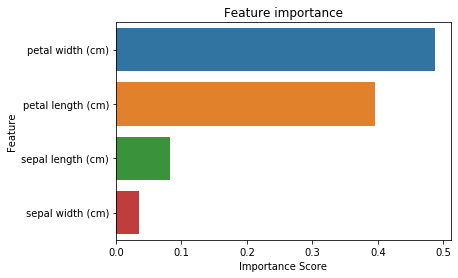

In [7]:
# Create a bar plot of the feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature importance")
plt.show()

### Test the new model by making a prediction based on new, never before seen data

In [8]:
# Create a new sample and use the model built above to predict the species
x_new = np.array([[5, 3.6, 1.3, 0.1]])

# Predict the class for this new sample
prediction = clf.predict(x_new)
print("***The predicted class for this sample is " + str(iris['target_names'][prediction][0]) + ".***")
print("***The correct class is setosa.***")


***The predicted class for this sample is setosa.***
***The correct class is setosa.***


### Just for fun, let's try it again.  This time we will use only petal width and length and compare to using all the features. 
We will use the same train/test sets as before.  With the random_state we chose, using only petal width and length performs just as well as using all features.  You should experiment with different random_state values to see how it can change.  Also, this is a small data set, so results may vary depending on data set size.

In [9]:
# X will be only the petal width and length features
X = iris.data[:, 2:4]

# Instantiate the Random Forest classifier
# n_estimators is number of trees to be used in the forest
clf=RandomForestClassifier(n_estimators=100)

# Train the model 
clf.fit(X_train,y_train)

# Make predictions based on the test set and get the accuracy
# Show the accuracy of the predictions
y_pred=clf.predict(X_test)

# Print the accuracy of both
print("***The initial accuracy was {:.2f}% ***".format(initial_accuracy))
print("***The accuracy using just petal width and length is {:.2f}% ***".format(metrics.accuracy_score(y_test, y_pred)*100))


***The initial accuracy was 96.67% ***
***The accuracy using just petal width and length is 96.67% ***


Credits
* https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset

